#Systolic Blood Pressure Data

In [1]:
#import statements
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as sm
from pandas.tools.plotting import scatter_matrix
import math
import statsmodels.stats.diagnostic as sms

In [3]:
#Loading data into pandas
systolic_bp = pd.read_csv('Ex03_SystolicBP_Regreesion.csv')
#systolic_bp

In [4]:
correlation_matrix = systolic_bp.corr()
correlation_matrix

,Age,Treated,Gender,FamilySize,Diet,Weight,Height,ScaledBMI,SystolicBP
Age,1.000000,-0.072606,0.075297,0.004664,-0.114006,-0.028380,0.151895,-0.126357,0.669539
Treated,-0.072606,1.000000,0.050122,-0.052271,-0.117269,-0.006899,-0.069158,0.033868,0.476901
Gender,0.075297,0.050122,1.000000,-0.152274,-0.004839,-0.003728,-0.002139,-0.007238,0.083053
FamilySize,0.004664,-0.052271,-0.152274,1.000000,0.071975,-0.038084,-0.178930,0.088567,0.020711
Diet,-0.114006,-0.117269,-0.004839,0.071975,1.000000,0.214507,-0.030904,0.150477,-0.071370
Weight,-0.028380,-0.006899,-0.003728,-0.038084,0.214507,1.000000,-0.100371,0.725423,0.361718
Height,0.151895,-0.069158,-0.002139,-0.178930,-0.030904,-0.100371,1.000000,-0.746394,-0.307311
ScaledBMI,-0.126357,0.033868,-0.007238,0.088567,0.150477,0.725423,-0.746394,1.000000,0.447285
SystolicBP,0.669539,0.476901,0.083053,0.020711,-0.071370,0.361718,-0.307311,0.447285,1.000000


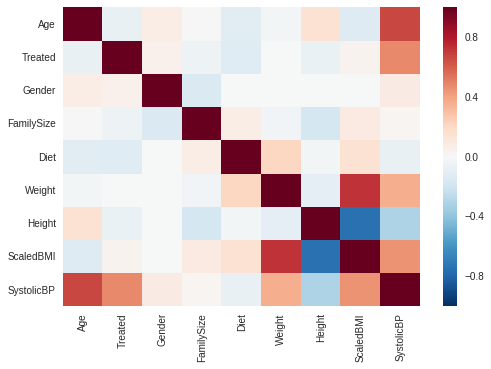

In [5]:
correlation_plot = sns.heatmap(correlation_matrix,
            xticklabels = correlation_matrix.columns.values,
            yticklabels = correlation_matrix.columns.values)
for label in correlation_plot.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.figure(figsize=(12,12))
plt.show()


#Finding Rmse value

In [6]:
data = systolic_bp.copy()
data_train = data.iloc[0:75,:]
data_test = data.iloc[75:,:]
data_x_train = data_train.iloc[:,0:8]
data_y_train = data_train.iloc[:,-1]
data_x_test = data_test.iloc[:,0:8]
data_y_test = data_test.iloc[:,-1]

regr = linear_model.LinearRegression()
print(regr.fit(data_x_train, data_y_train))
print(regr.coef_,"....", regr.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50600002e-01   6.44097990e+00   2.60992351e-02   4.60767424e-03
  -2.76507085e-02   3.71358927e-03   4.12692398e-01   5.70610066e-01] .... 60.4379062075


root mean squared error is 0.1194998797890182
percentage of accuracy is 0.999617000166


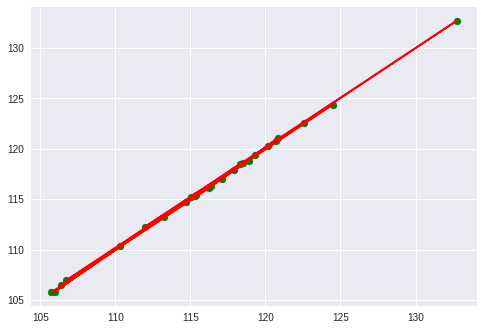

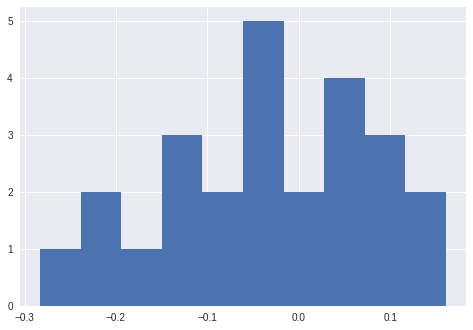

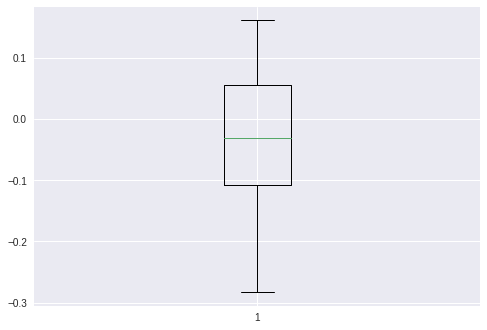

In [7]:
mean_squared_error = np.mean(((regr.predict(data_x_test)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("root mean squared error is",rmse)
print("percentage of accuracy is",regr.score(data_x_test,data_y_test))
plt.scatter(regr.predict(data_x_test),data_y_test,color = 'g')
plt.plot(regr.predict(data_x_test),data_y_test,color = 'r')
plt.show()
plt.hist(regr.predict(data_x_test)-data_y_test)
plt.show()
plt.boxplot(np.array(regr.predict(data_x_test)-data_y_test))
plt.show()

#ols method

In [8]:
model_1 = sm.ols(formula="SystolicBP ~ Age + Treated + Gender + FamilySize + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_1.params)
print(model_1.summary())

Intercept     60.103024
Age            0.650124
Treated        6.431615
Gender         0.035602
FamilySize    -0.004782
Diet          -0.039539
Weight        -0.000181
Height         0.691647
ScaledBMI      0.579271
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.935e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          1.67e-157
Time:                        11:24:57   Log-Likelihood:                 82.718
No. Observations:                 100   AIC:                            -147.4
Df Residuals:                      91   BIC:                            -124.0
Df Model:                           8                                         
Covariance Type:            nonrobust                     

#Rmse value ignoring familysize

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50610233e-01   6.43929657e+00   2.45322635e-02  -2.65731931e-02
   3.86201177e-03   3.85514298e-01   5.70203896e-01] .... 60.4932485045

 root mean squared error after ignoring familysize is 0.11800035473744053
percentage of accuracy is 0.999626551882


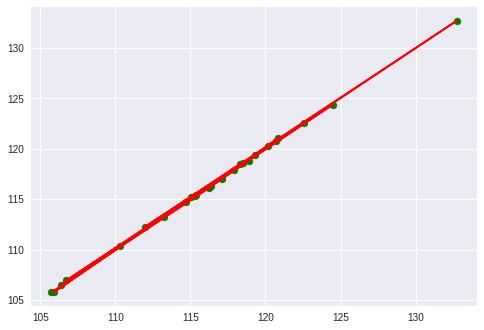

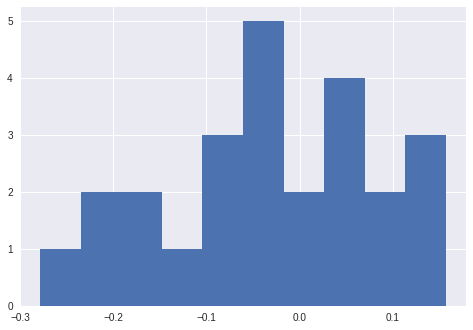

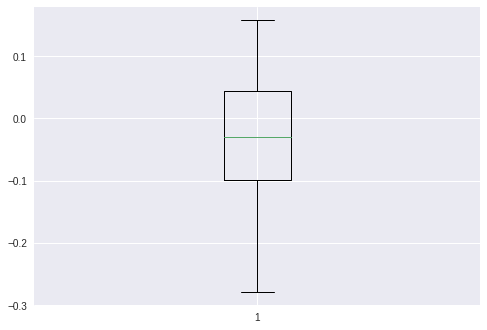

In [9]:
data_x_train_copy1 = data_x_train.copy()
data_x_test_copy1 = data_x_test.copy()
data_x_train_other = data_x_train_copy1.drop('FamilySize', axis = 1)
data_x_test_other = data_x_test_copy1.drop('FamilySize', axis = 1)
regr2 = linear_model.LinearRegression()
print(regr2.fit(data_x_train_other, data_y_train))
print(regr2.coef_,"....", regr2.intercept_)
mean_squared_error = np.mean(((regr2.predict(data_x_test_other)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize is",rmse)
print("percentage of accuracy is",regr2.score(data_x_test_other,data_y_test))
plt.scatter(regr2.predict(data_x_test_other),data_y_test,color = 'g')
plt.plot(regr2.predict(data_x_test_other),data_y_test,color = 'r')
plt.show()
plt.hist(regr2.predict(data_x_test_other)-data_y_test)
plt.show()
plt.boxplot(np.array(regr2.predict(data_x_test_other)-data_y_test))
plt.show()


#ols method

In [10]:
model_2 = sm.ols(formula="SystolicBP ~ Age + Treated + Gender + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_2.params)
print(model_2.summary())

Intercept    60.042466
Age           0.650092
Treated       6.432151
Gender        0.037251
Diet         -0.040309
Weight       -0.000338
Height        0.721136
ScaledBMI     0.579771
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.536e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          8.36e-160
Time:                        11:24:58   Log-Likelihood:                 82.606
No. Observations:                 100   AIC:                            -149.2
Df Residuals:                      92   BIC:                            -128.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
           

#Rmse value ignoring familysize and gender

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50784559e-01   6.44146674e+00  -2.29460704e-02   4.06384091e-03
   3.56672871e-01   5.69444144e-01] .... 60.5417226613

 root mean squared error after ignoring familysize and gender is 0.12196698416754997
percentage of accuracy is 0.99960102267


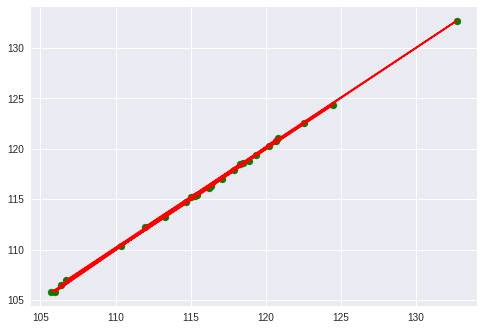

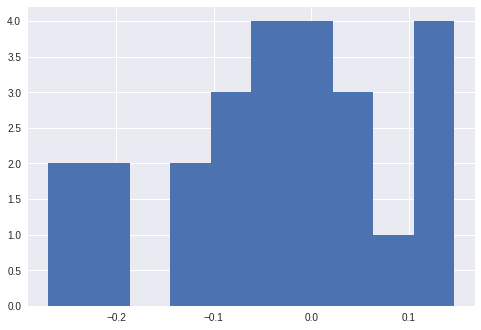

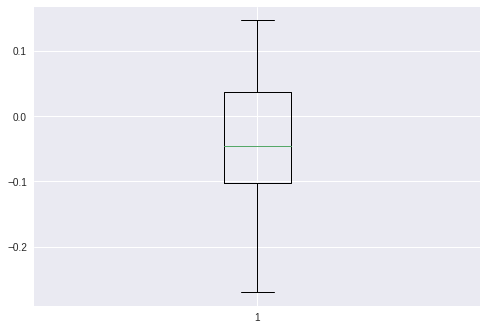

In [11]:
data_x_train_copy2 = data_x_train.copy()
data_x_test_copy2 = data_x_test.copy()
data_x_train_other2 = data_x_train_copy2.drop(['FamilySize', 'Gender'], axis = 1)
data_x_test_other2 = data_x_test_copy2.drop(['FamilySize', 'Gender'], axis = 1)
regr3 = linear_model.LinearRegression()
print(regr3.fit(data_x_train_other2, data_y_train))
print(regr3.coef_,"....", regr3.intercept_)
mean_squared_error = np.mean(((regr3.predict(data_x_test_other2)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize and gender is",rmse)
print("percentage of accuracy is",regr3.score(data_x_test_other2,data_y_test))
plt.scatter(regr3.predict(data_x_test_other2),data_y_test,color = 'g')
plt.plot(regr3.predict(data_x_test_other2),data_y_test,color = 'r')
plt.show()
plt.hist(regr3.predict(data_x_test_other2)-data_y_test)
plt.show()
plt.boxplot(np.array(regr3.predict(data_x_test_other2)-data_y_test))
plt.show()


#ols method

In [12]:
model_3 = sm.ols(formula="SystolicBP ~ Age + Treated + Diet + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_3.params)
print(model_3.summary())

Intercept    60.120603
Age           0.650292
Treated       6.434116
Diet         -0.040052
Weight        0.000093
Height        0.675885
ScaledBMI     0.578658
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.193e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          1.38e-161
Time:                        11:24:59   Log-Likelihood:                 81.121
No. Observations:                 100   AIC:                            -148.2
Df Residuals:                      93   BIC:                            -130.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err  

#Rmse value ignoring familysize, gender and diet

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.50960313e-01   6.44485098e+00   3.53952513e-03   3.79456471e-01
   5.70079117e-01] .... 60.481527621

 root mean squared error after ignoring familysize,gender and diet is 0.1258183818403384
percentage of accuracy is 0.999575427521


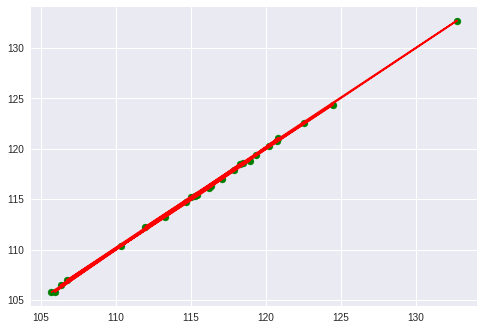

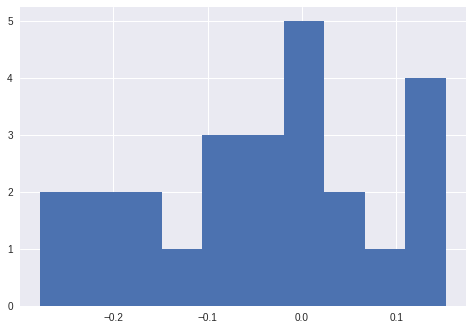

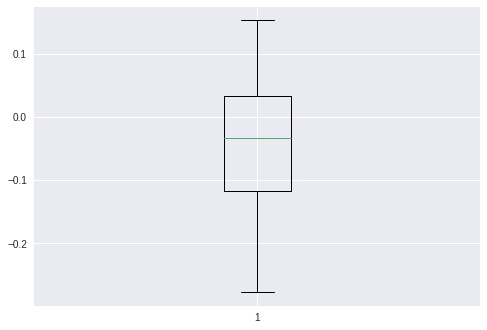

In [13]:
data_x_train_copy3 = data_x_train.copy()
data_x_test_copy3 = data_x_test.copy()
data_x_train_other3 = data_x_train_copy3.drop(['FamilySize', 'Gender','Diet'], axis = 1)
data_x_test_other3 = data_x_test_copy3.drop(['FamilySize', 'Gender','Diet'], axis = 1)
regr4 = linear_model.LinearRegression()
print(regr4.fit(data_x_train_other3, data_y_train))
print(regr4.coef_,"....", regr4.intercept_)
mean_squared_error = np.mean(((regr4.predict(data_x_test_other3)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize,gender and diet is",rmse)
print("percentage of accuracy is",regr4.score(data_x_test_other3,data_y_test))
plt.scatter(regr4.predict(data_x_test_other3),data_y_test,color = 'g')
plt.plot(regr4.predict(data_x_test_other3),data_y_test,color = 'r')
plt.show()
plt.hist(regr4.predict(data_x_test_other3)-data_y_test)
plt.show()
plt.boxplot(np.array(regr4.predict(data_x_test_other3)-data_y_test))
plt.show()

#ols method

In [14]:
model_4 = sm.ols(formula="SystolicBP ~ Age + Treated + Weight + Height + ScaledBMI", data=systolic_bp).fit()
print(model_4.params)
print(model_4.summary())

Intercept    59.891544
Age           0.650620
Treated       6.439417
Weight       -0.001507
Height        0.791200
ScaledBMI     0.581622
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SystolicBP   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.105e+04
Date:                Thu, 30 Mar 2017   Prob (F-statistic):          2.26e-163
Time:                        11:25:00   Log-Likelihood:                 79.560
No. Observations:                 100   AIC:                            -147.1
Df Residuals:                      94   BIC:                            -131.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|   

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[  6.51624271e-01   6.44037974e+00  -2.27590606e-03   5.69665374e-01] .... 61.3644836094

 root mean squared error after ignoring familysize,gender and diet is 0.12080258420426603
percentage of accuracy is 0.999608604256


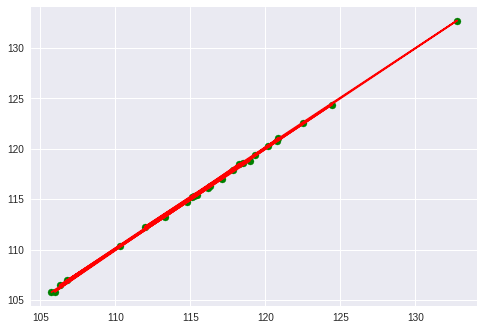

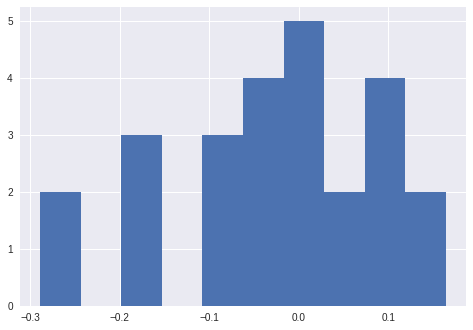

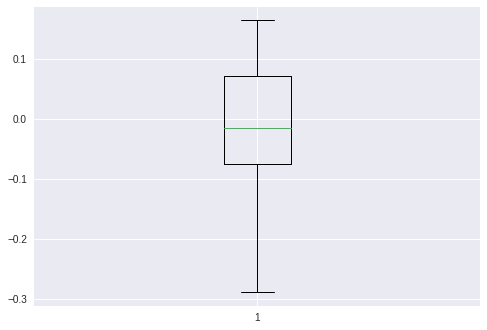

In [15]:
data_x_train_copy4 =data_x_train.copy()
data_x_test_copy4 = data_x_test.copy()
data_x_train_other4 = data_x_train_copy4.drop(['FamilySize', 'Gender', 'Weight', 'Height'], axis = 1)
data_x_test_other4 = data_x_test_copy4.drop(['FamilySize', 'Gender', 'Weight', 'Height'], axis = 1)
regr5 = linear_model.LinearRegression()
print(regr5.fit(data_x_train_other4, data_y_train))
print(regr5.coef_,"....", regr5.intercept_)
mean_squared_error = np.mean(((regr5.predict(data_x_test_other4)-data_y_test)**2))
rmse = math.sqrt(mean_squared_error)
print("\n root mean squared error after ignoring familysize,gender and diet is",rmse)
print("percentage of accuracy is",regr5.score(data_x_test_other4,data_y_test))
plt.scatter(regr5.predict(data_x_test_other4),data_y_test,color = 'g')
plt.plot(regr5.predict(data_x_test_other4),data_y_test,color = 'r')
plt.show()
plt.hist(regr5.predict(data_x_test_other4)-data_y_test)
plt.show()
plt.boxplot(np.array(regr5.predict(data_x_test_other4)-data_y_test))
plt.show()

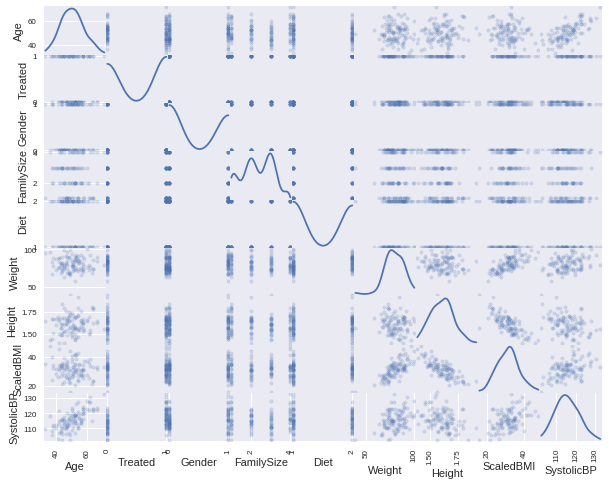

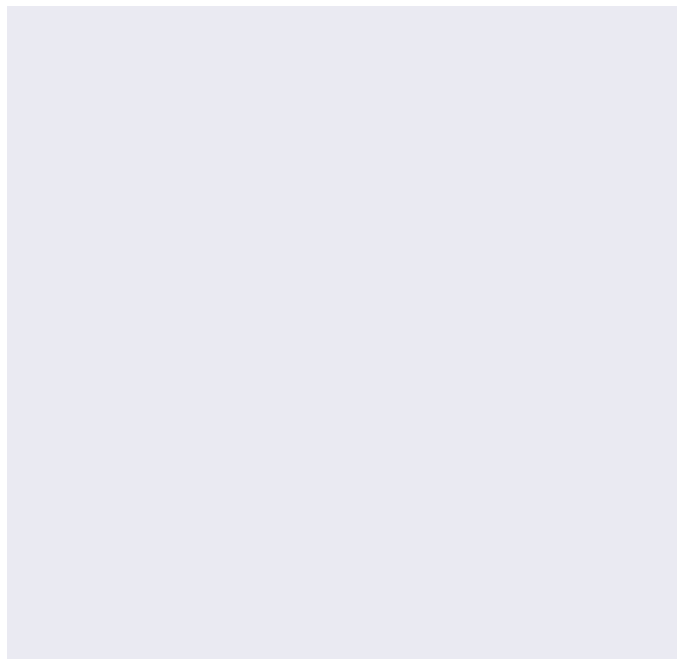

In [16]:
scatter_matrix(systolic_bp, alpha=0.2, figsize=(10, 8), diagonal='kde')
plt.figure(figsize = (12,12))
plt.xticks(())
plt.yticks(())
plt.show()

In [17]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model_2.resid, model_2.model.exog)
list(zip(name,test))

[('F statistics', 0.83969197332463141), ('p_value', 0.71309294538408907)]